In [1]:
#data has been submitted with google form, photo too

#use google drive api to connect to google form
#https://www.twilio.com/blog/2017/02/an-easy-way-to-read-and-write-to-a-google-spreadsheet-in-python.html
import gspread
from oauth2client.service_account import ServiceAccountCredentials

#https://pythonhosted.org/PyDrive/quickstart.html
from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth

In [4]:
gauth = GoogleAuth()
# Try to load saved client credentials
gauth.LoadCredentialsFile("mycreds.txt")
if gauth.credentials is None:
    # Authenticate if they're not there
    gauth.LocalWebserverAuth()
elif gauth.access_token_expired:
    # Refresh them if expired
    gauth.Refresh()
else:
    # Initialize the saved creds
    gauth.Authorize()
# Save the current credentials to a file
gauth.SaveCredentialsFile("mycreds.txt")

drive = GoogleDrive(gauth)

RefreshError: No refresh_token found.Please set access_type of OAuth to offline.

In [3]:
# use creds to create a client to interact with the Google Drive API
#this is the sheets api for the form responses (that sync to spreadsheet)
scope = ['https://www.googleapis.com/auth/spreadsheets', "https://www.googleapis.com/auth/drive.file", "https://www.googleapis.com/auth/drive"]
creds = ServiceAccountCredentials.from_json_keyfile_name('client_secret.json', scope)
client = gspread.authorize(creds)

# Find a workbook by name and open the first sheet
# Make sure you use the right name here.
sheet = client.open("postal_responses").sheet1

# Extract and print first value 
records = sheet.get_all_records()
records

[{'Timestamp': '06/11/2019 23:15:09',
  'First names': 'Michael',
  'Surname': 'Jackson',
  'Home address line 1': '1 Revolution Road',
  'Home address line 2': '',
  'Home address line 3': '',
  'Postcode': 'NW10 3AB',
  'Telephone (optional)': '',
  'Email address': 'gregwhynds@gmail.com',
  'Would you like to include your email address in your postal vote application form?': 'No',
  'How long do you want a postal vote for?': 'For the next election only (12th of December 2019)',
  'Date of birth': '09/08/1989',
  'Signature photo': 'https://drive.google.com/open?id=1vlv94Vc7Sa1qYPSGDZgpJF0WOw-z06I5',
  'Ballot address line 1': '',
  'Ballot address line 2': '',
  'Ballot address line 3': '',
  'Ballot postcode': '',
  "The reason you'd like your ballot sent to a different address": '',
  '__PowerAppsId__': ''}]

In [16]:
#includes functinoalty to delete rows
#sheet.delete_row(2)


In [17]:
r = records[0]

In [18]:
first_name = r['First names']
surname = r['Surname'] 
home_address1 = r['Home address line 1'] 
home_address2 = r['Home address line 2'] 
home_address3 = r['Home address line 3'] #
postcode = r['Postcode']
date_of_birth = r['Date of birth'].replace('/','')
next_election_only = True


telephone = r['Telephone (optional)']


email_send = r['Email address'] 
if r['Would you like to include your email address in your postal vote application form?']=='Yes':
    email = r['Email address']
else:
    email = ''

if r['How long do you want a postal vote for?']=='Until further notice (permanent postal vote)':
    next_election_only = True
else:
    next_election_only = False
        
#if sending ballot to different address from home address
#set to empty strings if not needed
ballot_address1 = r['Ballot address line 1'] #limit length 30
ballot_address2 = r['Ballot address line 2'] #limit length 30
ballot_address3 = r['Ballot address line 3']#limit length 30
ballot_postcode = r['Ballot postcode']
ballot_reason = r["The reason you'd like your ballot sent to a different address"] #limit length 90


#resize siganture, must not exceed 1 (1=max dimensions possible)
#worth testing different resizes out
#feature for end user?
resize = 1

#Assets included in repo
#Using different assets may prevent functions from working as expected
postal_path = "postal_vote_application_form.jpg"
font_path = "arial.ttf"

#id of photo in google drive
photo_id = r['Signature photo'].split('id=')[1]


In [19]:
#use google drive api to call signature photo
signature = drive.CreateFile({'id': photo_id})

#save file
signature.GetContentFile('signature{}.jpg'.format(photo_id))

#trash drive file
# signature.Trash()  # Move file to trash.
# signature.UnTrash()  # Move file out of trash.
#signature.Delete()  # Permanently delete the file.

#load signature as array
signature_path = 'signature{}.jpg'.format(photo_id)

In [8]:
%run -i 'postal_vote.py'

In [9]:
_test1 = postal_vote(first_name, surname, postcode, date_of_birth,
                    home_address1, home_address2, home_address3,telephone, email,
                    ballot_address1, ballot_address2, ballot_address3,
                    ballot_postcode, ballot_reason, next_election_only,
                    postal_path, font_path)

_test2= add_signature(_test1, signature_path, resize)

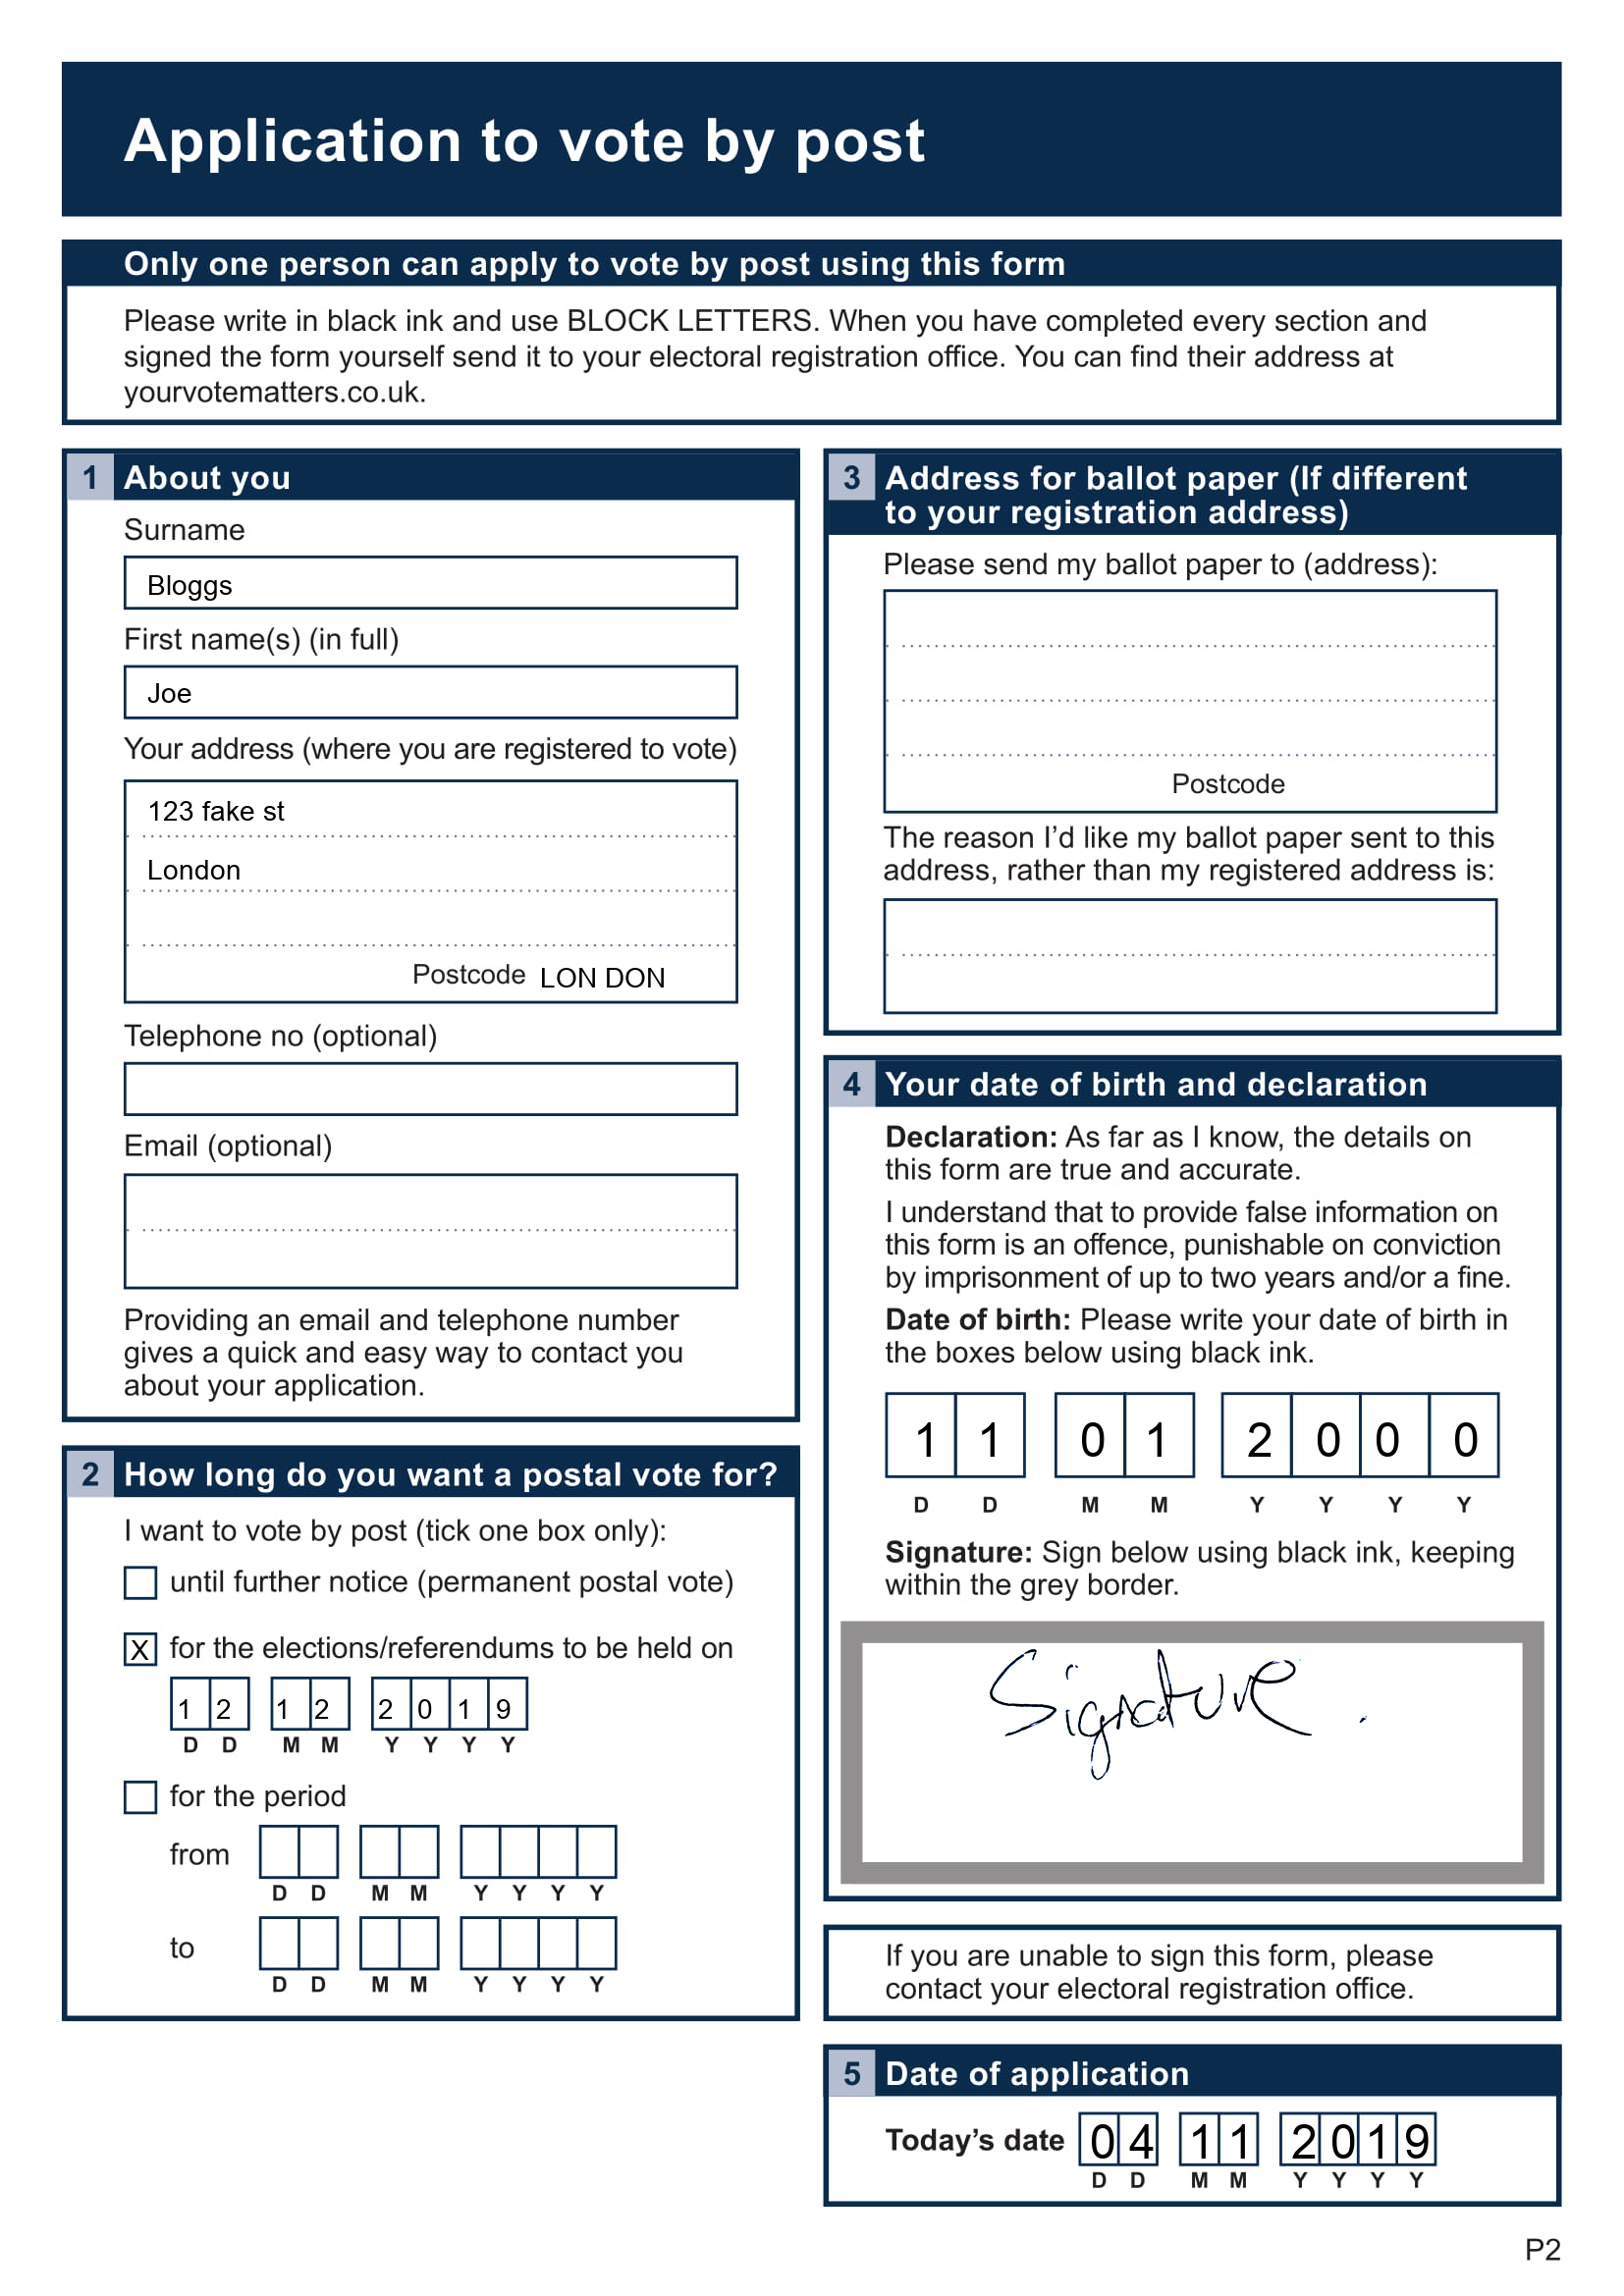

In [10]:
_test2